# Lab 6: Neural Networks Basics

## 1. Data generation
Generate some data y with random noise. y should be the sum of smooth function y0 and noise

```python
n = 1000
x = np.sort(np.random.rand(n)-0.5)
noise = np.random.normal(size=n, scale=0.3)
y0 =  .....    # your target function, for example np.sin(7*x)
y = y0 + noise
```

In [1]:
import numpy as np

# place for code
n = 1000
x = np.sort(np.random.rand(n)-0.5)
noise = np.random.normal(size=n, scale=0.3)
y0 =  np.sin(3*x)    # your target function, for example 
y = y0 + noise



## 2. Data visualization
Plot y and y0 on the same graph (y0 plot last and use plot parameter lw=5)

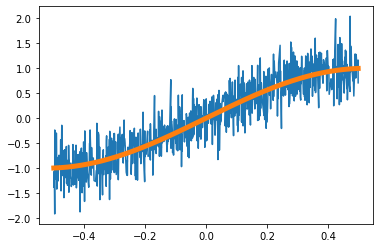

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# place for code
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,y0, lw=5)



## 3. Approximation model
Define an approximation model y_approx(x, wa, wb, wc, wd) with some weights wa,wb,wc,wd,..., which we will optimize. You can try any differenciable function. For example polynom:

```python
def y_approx(x, wa, wb, wc, wd):
    return wa + wb*x + wc*x**2 + wd*x**3
```

In [3]:
# place for code
def y_approx(x, wa, wb, wc, wd):
    return wa + wb*x + wc*x**2 + wd*x**3

## 4. Gradient descent method

Train your model using gradient descent method. Choose learning_rate and epoch count to reach the loss = 0.098

In [4]:
# Initialize weights wa, wb, wc, wd
np.random.seed(77)
wa = np.random.rand()
wb = np.random.rand()
wc = np.random.rand()
wd = np.random.rand()

# epoch loop
for epoch in range(10000):
    
    # Forward pass: compute predicted y y_pred for whole vector x using your approximation model
    y_pred = y_approx(x, wa, wb, wc, wd)
    
    # true y
    y_true = y
    
    # Compute loss
    loss = ((y_pred - y_true)**2).mean()
    
    # Print loss
    print(f'epoch = {epoch}, loss = {loss}')
    
    # Compute gradient of loss (derivatives of loss by weights)
    dloss_by_y_pred = 2*(y_pred - y_true)/n
    dy_pred_by_wa = 1
    dy_pred_by_wb = x
    dy_pred_by_wc = x**2
    dy_pred_by_wd = x**3
    dloss_by_wa = np.sum(dloss_by_y_pred*dy_pred_by_wa)
    dloss_by_wb = np.sum(dloss_by_y_pred*dy_pred_by_wb)
    dloss_by_wc = np.sum(dloss_by_y_pred*dy_pred_by_wc)
    dloss_by_wd = np.sum(dloss_by_y_pred*dy_pred_by_wd)
    
    # Slightly change weights to decrease loss in oposite to gradent direction
    learning_rate = 0.9
    wa -= learning_rate*dloss_by_wa
    wb -= learning_rate*dloss_by_wb
    wc -= learning_rate*dloss_by_wc
    wd -= learning_rate*dloss_by_wd

 9510, loss = 0.08960214139371038
epoch = 9511, loss = 0.08960214134858573
epoch = 9512, loss = 0.0896021413035169
epoch = 9513, loss = 0.08960214125850383
epoch = 9514, loss = 0.08960214121354641
epoch = 9515, loss = 0.08960214116864464
epoch = 9516, loss = 0.08960214112379838
epoch = 9517, loss = 0.08960214107900764
epoch = 9518, loss = 0.08960214103427228
epoch = 9519, loss = 0.08960214098959224
epoch = 9520, loss = 0.0896021409449675
epoch = 9521, loss = 0.08960214090039796
epoch = 9522, loss = 0.08960214085588353
epoch = 9523, loss = 0.08960214081142419
epoch = 9524, loss = 0.08960214076701983
epoch = 9525, loss = 0.0896021407226704
epoch = 9526, loss = 0.08960214067837585
epoch = 9527, loss = 0.08960214063413607
epoch = 9528, loss = 0.08960214058995103
epoch = 9529, loss = 0.08960214054582065
epoch = 9530, loss = 0.08960214050174484
epoch = 9531, loss = 0.08960214045772358
epoch = 9532, loss = 0.08960214041375676
epoch = 9533, loss = 0.0896021403698443
epoch = 9534, loss = 0.0896

In [5]:
print('Totally we use', epoch*n, 'objects while training')
# print final weights wa, wb, wc, wd
print(wa, wb, wc, wd)


Totally we use 9999000 objects while training
0.014470336793760915 2.8775575185385387 -0.08593368278460674 -3.256215364002329


## 5. Result
Plot result model with initial data on the same graph. If you don't like your result, try to change model or initial weights and restart training

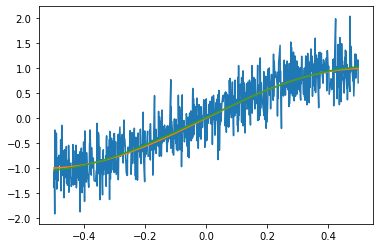

In [6]:
# place for code
fig, bx = plt.subplots()
y_pred = y_approx(x, wa, wb, wc, wd)

bx.plot(x,y)
bx.plot(x,y0)
bx.plot(x, y_pred)


## 6. Stochastic gradient descent
Copy missing code from task 4 and change it to process one object `x[ind]` with random index `ind` at a time. 

How many objects you need to process to reach the same loss?

In [7]:
# Initialize weights
wa = np.random.rand()
wb = np.random.rand()
wc = np.random.rand()
wd = np.random.rand()
# Initialize mean_loss with zero
mean_loss = 0

# fix random seed to make result deterministic
np.random.seed(0)

# loop by objects
for cycle in range(9870):
    # use np.random.choice function to take random index ind inside interval [0,n-1]
    ind = np.random.choice(range(n))
    
    
    # Forward pass: compute predicted y_pred for chosen object x[ind]

    y_pred = y_approx(x[ind], wa, wb, wc, wd)
    
    # Compute loss for one object
    loss = (y_pred - y_true[ind])**2
    
    # Compute mean loss for several cycles using exponential moving average and alpha = 0.01
    # https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
    alpha = 0.01
    mean_loss = alpha*loss + (1-alpha)*mean_loss
    
    
    # Compute gradient of loss - we shouldn't divide by n here
    dloss_by_y_pred = 2*(y_pred - y_true[ind])
    dy_pred_by_wa = 1
    dy_pred_by_wb = x[ind]
    dy_pred_by_wc = x[ind]**2
    dy_pred_by_wd = x[ind]**3
    dloss_by_wa = (dloss_by_y_pred*dy_pred_by_wa)
    dloss_by_wb = (dloss_by_y_pred*dy_pred_by_wb)
    dloss_by_wc = (dloss_by_y_pred*dy_pred_by_wc)
    dloss_by_wd = (dloss_by_y_pred*dy_pred_by_wd)
    
    # Slightly change weights to decrease loss in oposite to gradent direction
    learning_rate = 0.1
    wa -= learning_rate*dloss_by_wa
    wb -= learning_rate*dloss_by_wb
    wc -= learning_rate*dloss_by_wc
    wd -= learning_rate*dloss_by_wd

    # Print loss
    print(f'cycle = {cycle}, mean loss = {mean_loss}')

163292606
cycle = 9434, mean loss = 0.08697865362563344
cycle = 9435, mean loss = 0.08711169527671372
cycle = 9436, mean loss = 0.08654945240941972
cycle = 9437, mean loss = 0.08739298242077218
cycle = 9438, mean loss = 0.08653547197765928
cycle = 9439, mean loss = 0.08614491552636515
cycle = 9440, mean loss = 0.0859417539081247
cycle = 9441, mean loss = 0.08673015342593829
cycle = 9442, mean loss = 0.08593013252101099
cycle = 9443, mean loss = 0.08583924805032263
cycle = 9444, mean loss = 0.08567670328037583
cycle = 9445, mean loss = 0.08505581432345555
cycle = 9446, mean loss = 0.08450474952157154
cycle = 9447, mean loss = 0.0853569289571386
cycle = 9448, mean loss = 0.0846157932237927
cycle = 9449, mean loss = 0.08474473164337774
cycle = 9450, mean loss = 0.08405851494987028
cycle = 9451, mean loss = 0.08386890174987796
cycle = 9452, mean loss = 0.08398558444193685
cycle = 9453, mean loss = 0.08351289143655943
cycle = 9454, mean loss = 0.08524412344435724
cycle = 9455, mean loss = 0

Totally we use 9869 objects while training
0.017854879159695247 2.485507622294845 -0.04059735750072278 -1.2984864954814874
mean loss is: 0.11247925557607565


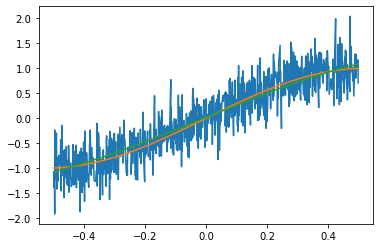

In [8]:
fig, cx = plt.subplots()
y_pred = y_approx(x, wa, wb, wc, wd)

cx.plot(x,y)
cx.plot(x,y0)
cx.plot(x, y_pred)

print('Totally we use', cycle, 'objects while training')
# print final weights wa, wb, wc, wd
print(wa,wb,wc,wd)
print(f'mean loss is: {mean_loss}')


## 7. Batches
Mordern computational accelerators require grouping of objects in batches. Copy code from task 6 and change it to process a batch of 32 random objects at a time.

Calculate, how many objects you need to process to reach the same loss?

In [12]:
# place for code
wa = np.random.rand()
wb = np.random.rand()
wc = np.random.rand()
wd = np.random.rand()
mean_loss = 0
mean_loss_group = 0
np.random.seed(0)

ind = [0]*32
loss = [0]*32
y_pred = [0]*32
y_true = [0]*32
# loop by objects
for cycle in range(10000):
    ind = np.random.choice(range(n),32)

    y_pred = y_approx(x[ind], wa, wb, wc, wd)
    y_true = y[ind]
    loss = ((y_pred - y_true)**2).mean()
    

    alpha = 0.01
    mean_loss = alpha*loss + (1-alpha)*mean_loss
    
    
    dloss_by_y_pred = 2*(y_pred - y_true)/32
    dy_pred_by_wa = 1
    dy_pred_by_wb = x[ind]
    dy_pred_by_wc = x[ind]**2
    dy_pred_by_wd = x[ind]**3

    dloss_by_wa = np.sum(dloss_by_y_pred*dy_pred_by_wa)
    dloss_by_wb = np.sum(dloss_by_y_pred*dy_pred_by_wb)
    dloss_by_wc = np.sum(dloss_by_y_pred*dy_pred_by_wc)
    dloss_by_wd = np.sum(dloss_by_y_pred*dy_pred_by_wd)

    learning_rate = 0.1
    wa -= learning_rate*dloss_by_wa
    wb -= learning_rate*dloss_by_wb
    wc -= learning_rate*dloss_by_wc
    wd -= learning_rate*dloss_by_wd

    # Print loss
    print(f'cycle = {cycle}, mean loss = {mean_loss}')



cycle = 9564, mean loss = 0.08904613093598654
cycle = 9565, mean loss = 0.08910618840984809
cycle = 9566, mean loss = 0.089566171550698
cycle = 9567, mean loss = 0.08953140526005639
cycle = 9568, mean loss = 0.0893830249395341
cycle = 9569, mean loss = 0.0895662808907507
cycle = 9570, mean loss = 0.0896626340137901
cycle = 9571, mean loss = 0.09006953845215725
cycle = 9572, mean loss = 0.08975531534136817
cycle = 9573, mean loss = 0.08978875197669281
cycle = 9574, mean loss = 0.08950677537973181
cycle = 9575, mean loss = 0.08939290995112491
cycle = 9576, mean loss = 0.08963951757979345
cycle = 9577, mean loss = 0.09011960615169598
cycle = 9578, mean loss = 0.09007299116182406
cycle = 9579, mean loss = 0.0896626773904086
cycle = 9580, mean loss = 0.08954277410265618
cycle = 9581, mean loss = 0.08914473123946946
cycle = 9582, mean loss = 0.08914390861552353
cycle = 9583, mean loss = 0.08933465750151763
cycle = 9584, mean loss = 0.08952490820918008
cycle = 9585, mean loss = 0.08912564894

Totally we use 9999 objects while training
-0.012762050323960978 2.617323848993395 -0.054911925498234225 -1.4861197380119902
mean loss is: 0.09100560297619521


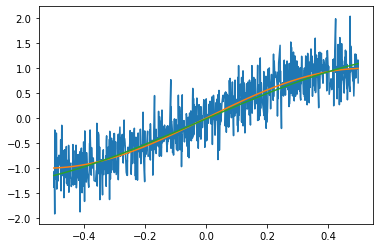

In [13]:
fig, dx = plt.subplots()
y_pred = y_approx(x, wa, wb, wc, wd)

dx.plot(x,y)
dx.plot(x,y0)
dx.plot(x, y_pred)

print('Totally we use', cycle, 'objects while training')
# print final weights wa, wb, wc, wd
print(wa,wb,wc,wd)
print(f'mean loss is: {mean_loss}')

## 8. PyTorch

If you have not installed PyTorch library for neural net training, do it now by command:

```bash
pip install torch
```
Implement your model using PyTorch library, which can automatically evaluate gradients and apply gradient descent method

In [14]:
import torch

class ApproxModel(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        # initialize model parameters, using special class Parameter
        self.w = torch.nn.Parameter(torch.Tensor([0, 0, 0, 0]))
        
    def forward(self, x):
        # forward step function should return model value y_approx for weights w[0], w[1], w[2], w[3]
        return self.w[0] + self.w[1] * x + self.w[2] * x**2 + self.w[3] * x**3
    
model = ApproxModel()

# class to apply gradient descent method and change model parameters
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

mean_loss = 0

for cycle in range(10000):
    
    ind = np.random.choice(n, size=32)
    x1 = torch.tensor(x[ind])
    y_true = torch.tensor(y[ind])
    
    # Forward pass: compute predicted y for all x
    y_pred = model(x1)
    
    # Compute loss
    loss = ((y_pred - y_true)**2).mean()
    
    # Print average loss
    lamb = 0.01
    mean_loss = lamb*loss + (1-lamb)*mean_loss
    print(f'cycle = {cycle}, loss = {mean_loss}')
    
    # initialize gradients
    optimizer.zero_grad()
    
    # calculate gradients 
    loss.backward()
    
    # change weights to decrease loss in oposite to gradent direction
    optimizer.step()

232301
cycle = 9510, loss = 0.09171484240348514
cycle = 9511, loss = 0.09193227487952571
cycle = 9512, loss = 0.0921296856121704
cycle = 9513, loss = 0.09192260623125932
cycle = 9514, loss = 0.09211752029081643
cycle = 9515, loss = 0.0925302521740246
cycle = 9516, loss = 0.09243628954225452
cycle = 9517, loss = 0.09237526686935014
cycle = 9518, loss = 0.09257574130132304
cycle = 9519, loss = 0.09219524192963097
cycle = 9520, loss = 0.09245101934724967
cycle = 9521, loss = 0.0925944752492676
cycle = 9522, loss = 0.09256820775282978
cycle = 9523, loss = 0.09282890252955615
cycle = 9524, loss = 0.09282780506177646
cycle = 9525, loss = 0.092929895173461
cycle = 9526, loss = 0.0925829818201579
cycle = 9527, loss = 0.09257167082277652
cycle = 9528, loss = 0.09240729581972518
cycle = 9529, loss = 0.0926641765608677
cycle = 9530, loss = 0.09231444893794859
cycle = 9531, loss = 0.09217689658094347
cycle = 9532, loss = 0.09240450816220862
cycle = 9533, loss = 0.09221369737424766
cycle = 9534, lo

In [15]:
# print result weights
print('Result:', model.w)

Result: Parameter containing:
tensor([-0.0212,  2.5961, -0.0453, -1.4498], requires_grad=True)


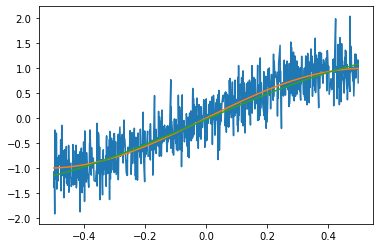

In [16]:
# To use weights outside neural net (with automatic gradient calculation) we need to "detach" it
w = model.w.detach().numpy()

# Plot result model with initial data on the same graph

fig, ex = plt.subplots()
y_pred = y_approx(x, w[0], w[1], w[2], w[3])

ex.plot(x,y)
ex.plot(x,y0)
ex.plot(x, y_pred)



## 9

Make your model more complex to reach better quality. Enjoy automatic gradient evaluation by PyTorch library

In [ ]:
# place for code


